In [158]:
#Librerias generales
import pandas as pd
import numpy as np

#Librerias para gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Creación de app
import streamlit as st

In [159]:
# Configurar visualizaciones
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [160]:
#datos
df = pd.read_csv('/Users/n.arcos89/Documents/GitHub/upgrade-hub-marketing-analysis/Preprocesamiento/roi-preprocesamiento-marketing.csv')

In [161]:
df.head(2)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_days,beneficio_neto,budget_cat,revenue_cat,roi_cat
0,Public-key multi-tasking throughput,2023-04-01 00:00:00+00:00,2024-02-23 00:00:00+00:00,80823.0,0.35,email,B2B,organic,0.40,709593.48,328.0,628770.48,Medio,Muy Alto,Bajo
1,De-engineered analyzing task-force,2023-02-15 00:00:00+00:00,2024-04-22 00:00:00+00:00,1771298.0,0.74,email,B2C,promotion,0.66,516609.10,432.0,-1254688.90,Muy Alto,Muy Alto,Bajo


#### Detectar Ourliers

In [162]:
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

from pathlib import Path
data_dir = Path('../input/images')

In [163]:
# Crear subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Outliers en Revenue', 'Outliers en ROI', 'Outliers en Conversion Rate'))

# Definir tonos del boxplot
blue_tones = ['#ADD8E6', '#87CEEB', '#4682B4']  # Azul claro, Azul cielo, Azul acero

# Añadir boxplots con tonos de azul
fig.add_trace(go.Box(y=df['revenue'], name='Revenue', marker_color=blue_tones[0]), row=1, col=1)
fig.add_trace(go.Box(y=df['roi'], name='ROI', marker_color=blue_tones[1]), row=1, col=2)
fig.add_trace(go.Box(y=df['conversion_rate'], name='Conversion Rate', marker_color=blue_tones[2]), row=1, col=3)

# Actualizar layout
fig.update_layout(title_text='Visualización de valores atípicos', height=600, width=800)

# Mostrar la figura
fig.show()

#### Cálculos genéricos

In [164]:
#Calcular media de valores numéricos
inversión = df['budget']
np.mean(inversión) #media

np.float64(3926790.089478859)

In [190]:
np.mean(roi) #media

np.float64(-0.9450616632362933)

In [191]:
ganancia = df['revenue']
np.mean(ganancia) #media

np.float64(513035.2421507295)

In [192]:
np.mean(df['beneficio_neto']) # media

np.float64(-3413754.8473281297)

In [193]:
#cálculo desviación tipica
np.std(inversión)


np.float64(3150979.0100788195)

In [169]:
np.std(roi)


np.float64(0.19525631724810583)

In [170]:
np.std(ganancia) 


np.float64(287155.52288305736)

In [171]:
np.std(df['beneficio_neto'])

np.float64(3161787.1790617006)

In [172]:
#cálculo de máximos
np.max(inversión) #máximo

np.float64(9999999.0)

In [173]:
np.max(roi)

np.float64(0.6025787903356575)

In [174]:
np.max(ganancia)

np.float64(999712.49)

In [175]:
np.max(df['beneficio_neto'])

np.float64(921951.1)

In [176]:
#calculo de minimos
np.min(inversión)

np.float64(-10000.0)

In [177]:
np.min(ganancia)

np.float64(108.21)

In [178]:
np.min(roi)

np.float64(-5.19718388)

In [179]:
np.min(df['beneficio_neto'])

np.float64(-9980862.5)

#### Generación de gráficas para tener vision general de los datos

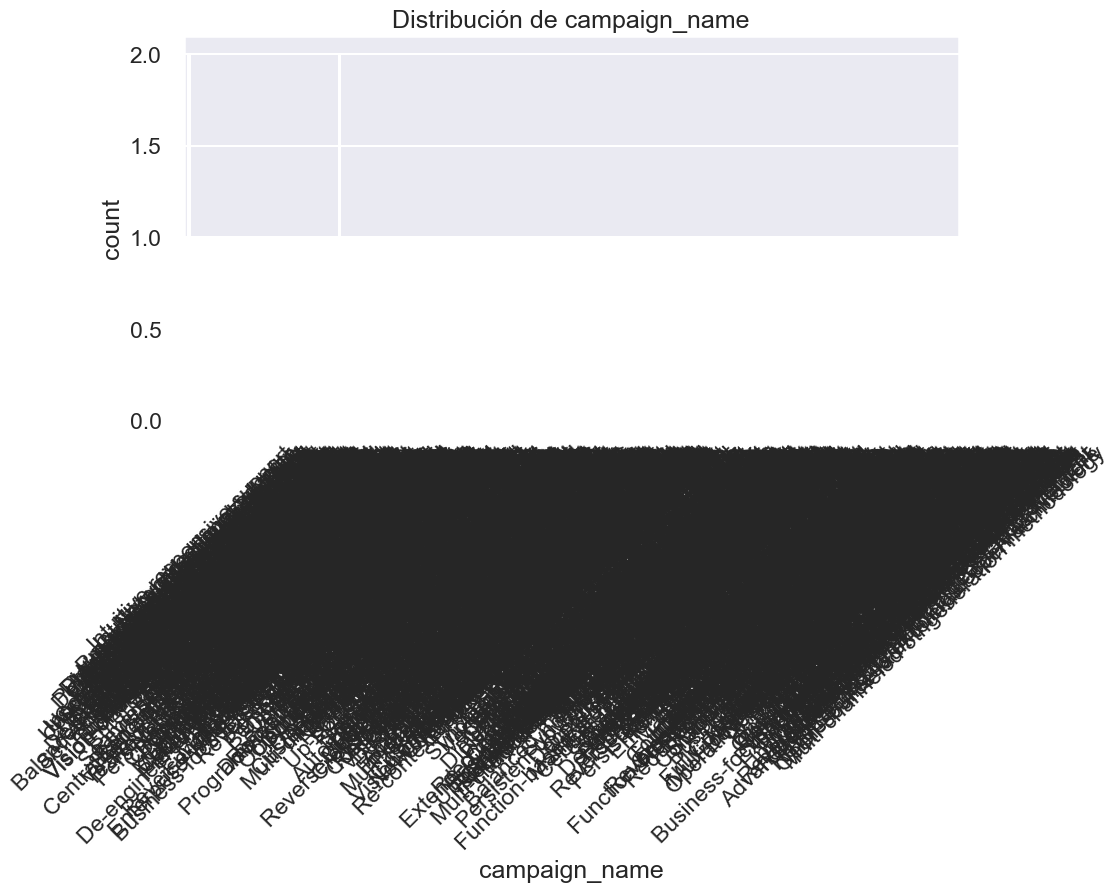

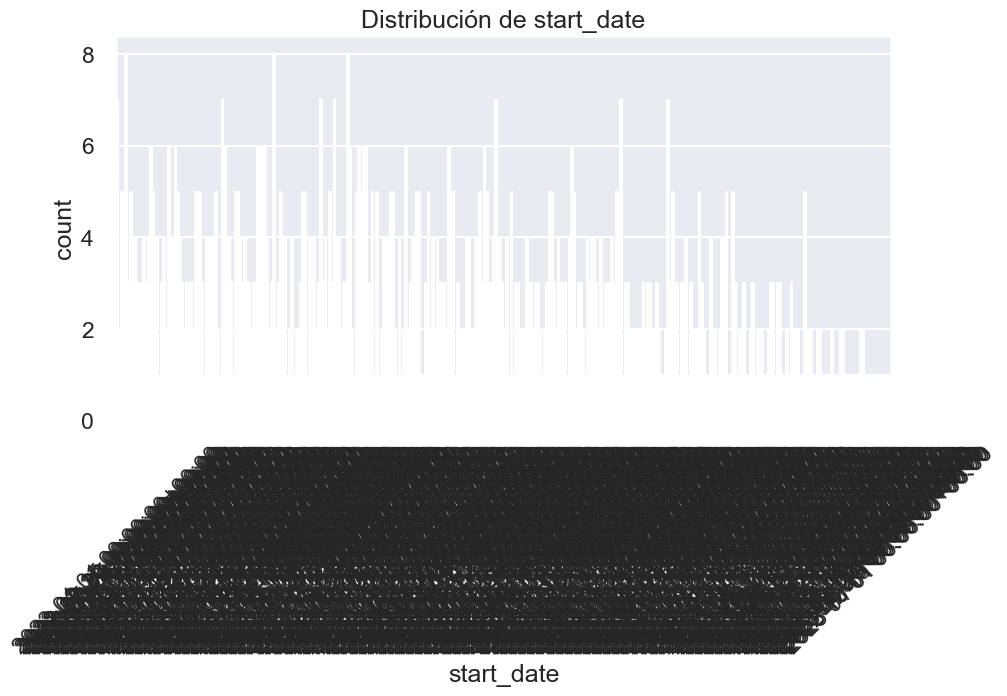

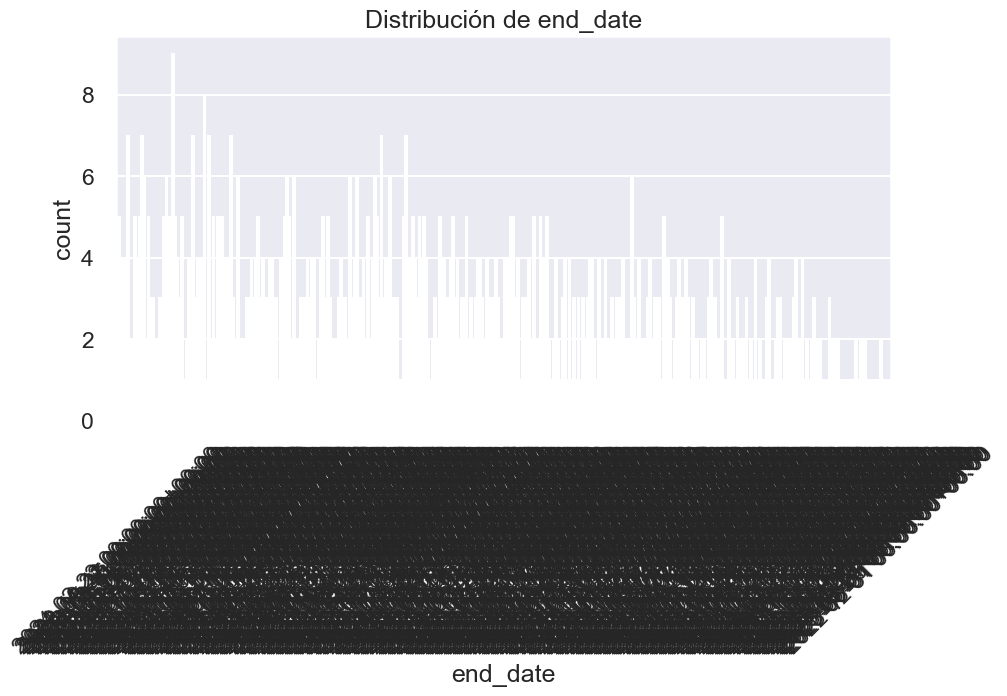

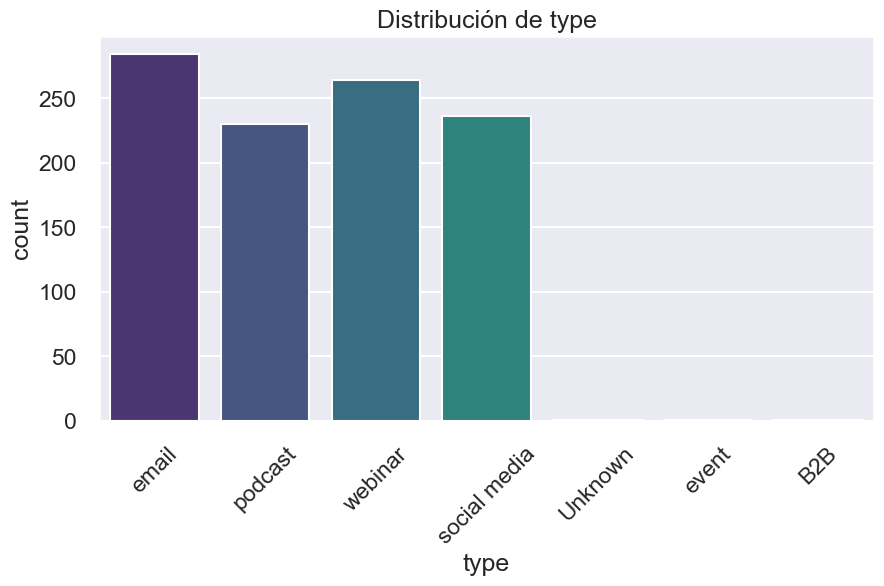

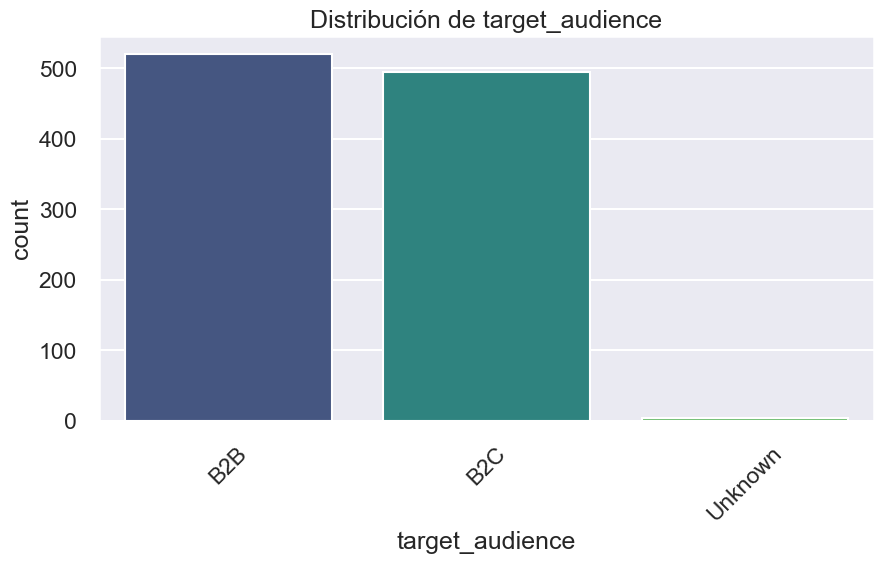

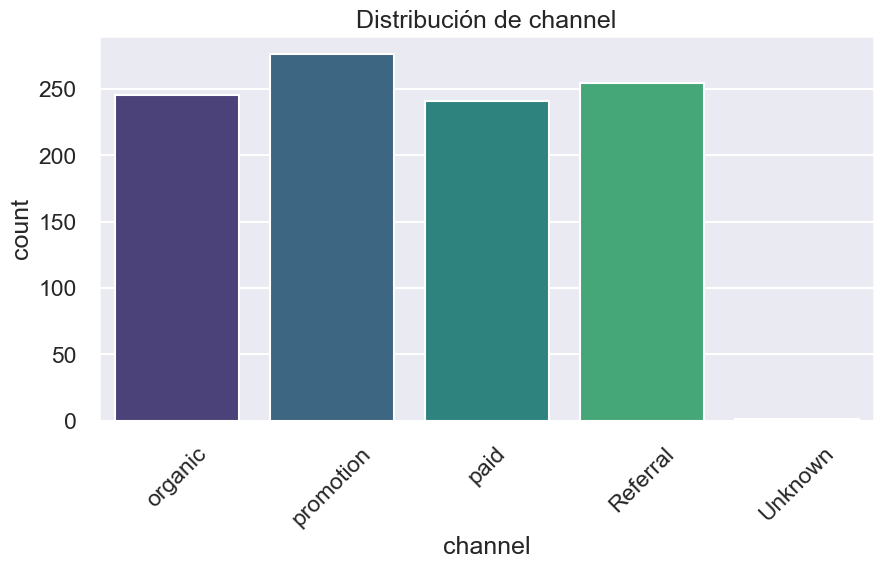

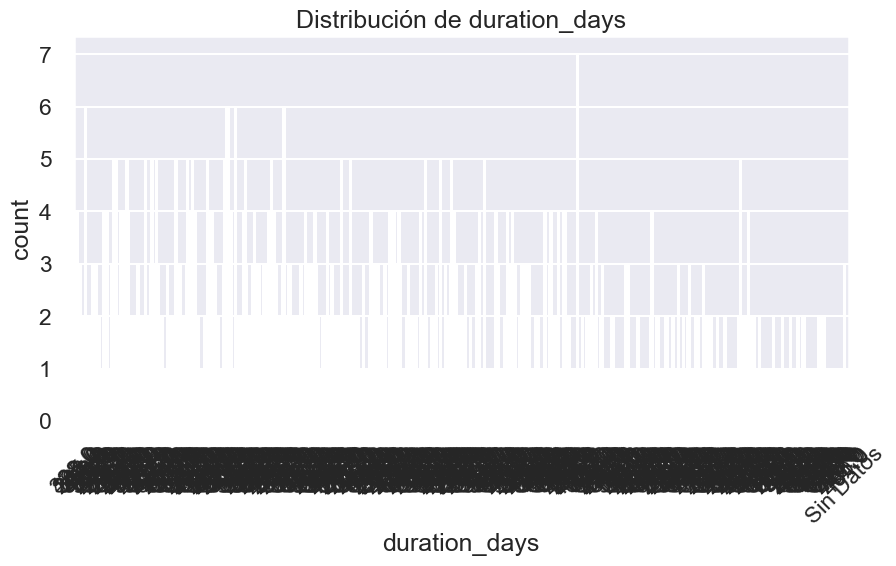

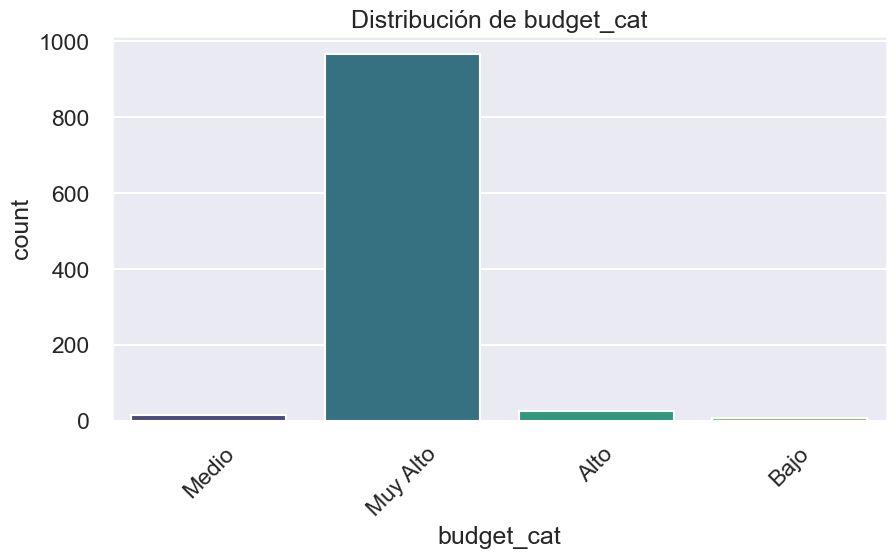

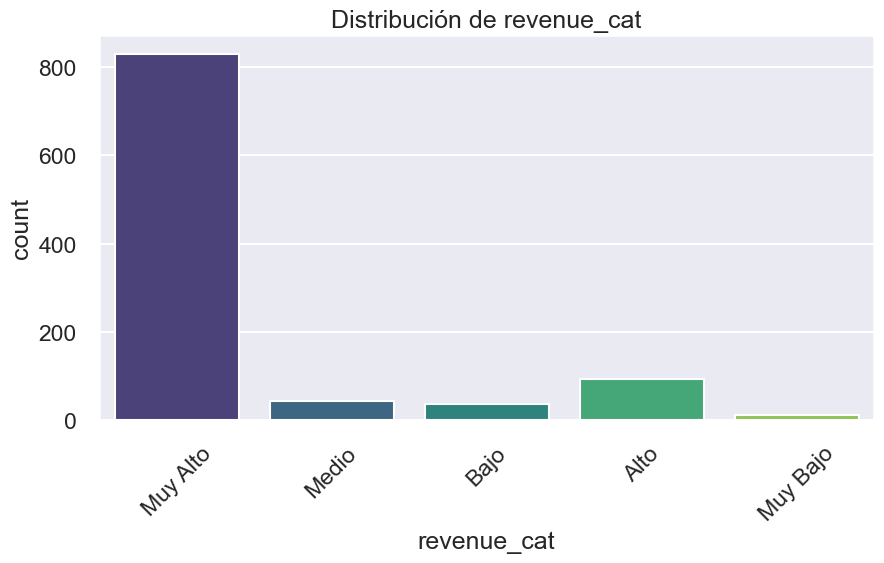

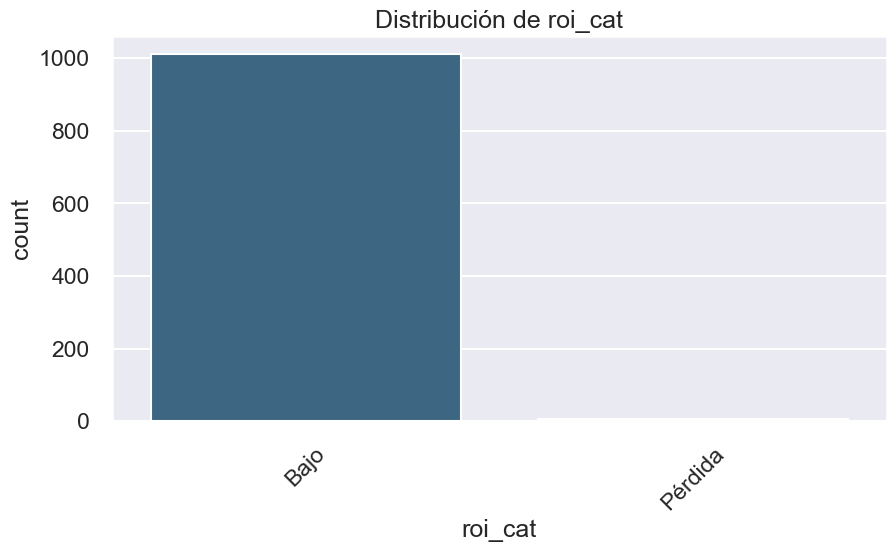

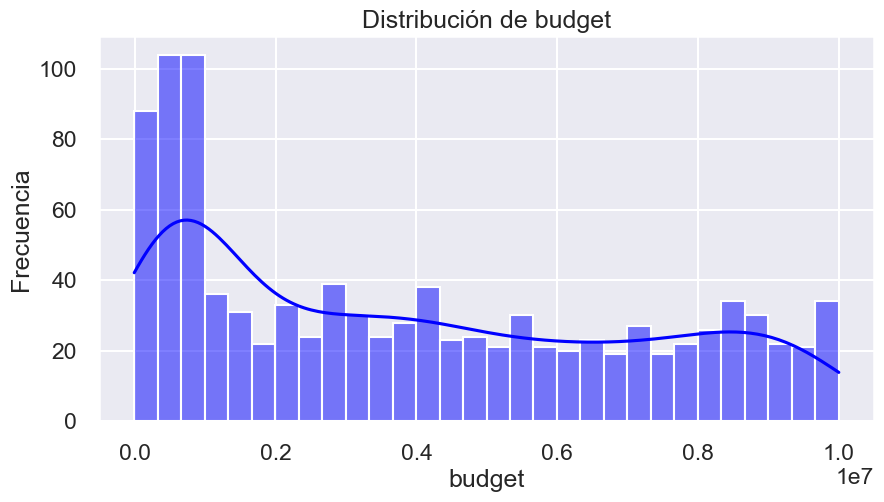

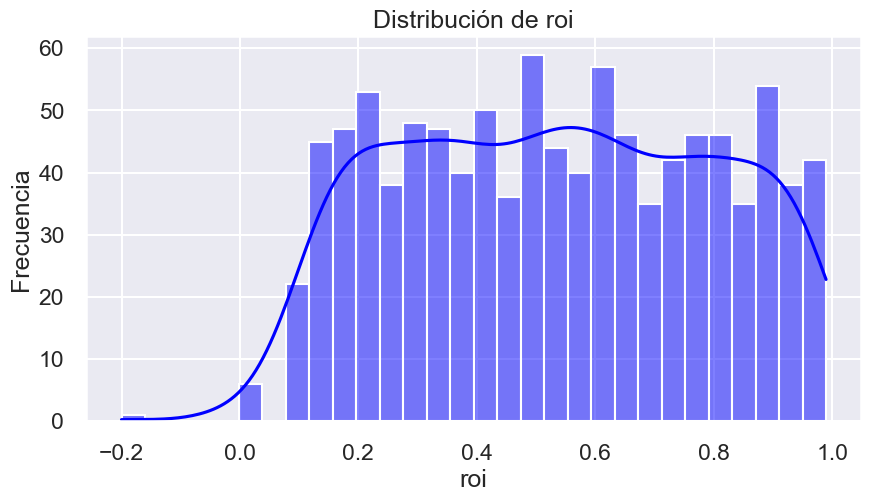

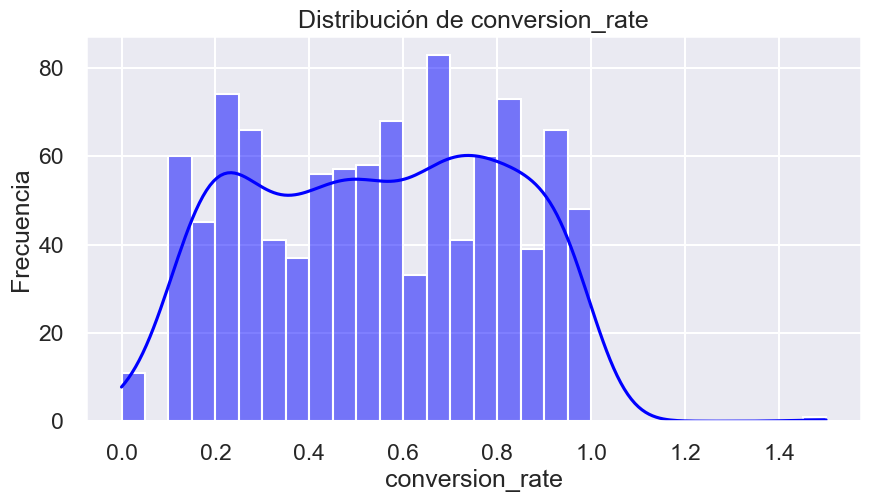

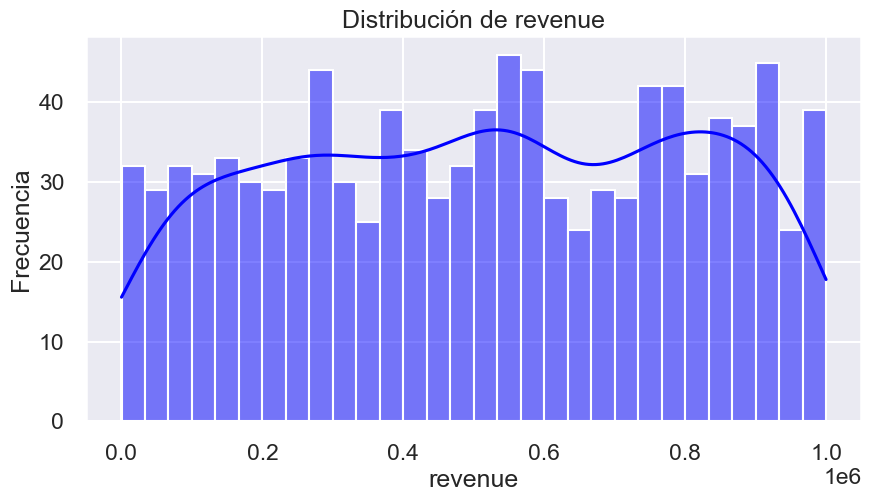

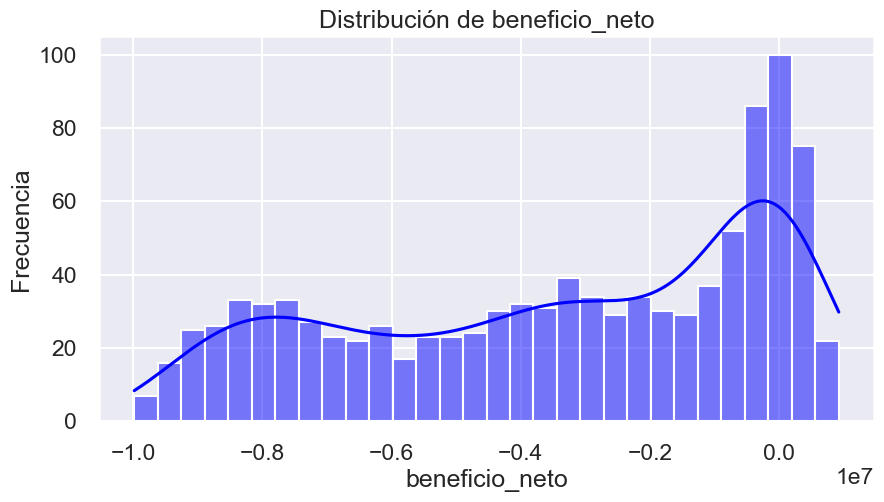

In [180]:
#Gráficas para obtener una visión general de los datos para entenderlos y extraer conclusiones

def plot_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df, col)
for col in numerical_cols:
    plot_numerical_distribution(df, col)

#### Análisis campañas

In [181]:
#porcentaje de roi considerado pérdida
roi_perdida = df[df['roi'] < 0].shape[0] / df.shape[0] * 100
roi_perdida

0.09832841691248771

In [182]:
#porcentaje de campañas B2B
b2b = df[df['target_audience'] == 'B2B'].shape[0] / df.shape[0] * 100
b2b


51.130776794493606

In [183]:
#porcentaje campañas B2C
b2c = df[df['target_audience'] == 'B2C'].shape[0] / df.shape[0] * 100
b2c

48.574237954768925

In [184]:
# Porcentaje de gasto por canal
colores_canales = {
    canal: color for canal, color in zip(
        porcentaje_gasto['Canal'],
        px.colors.qualitative.Plotly
    )
}

fig = px.pie(
    porcentaje_gasto,
    values='Porcentaje de Gasto',
    names='Canal',
    title='Distribución del Gasto por Canal',
    color='Canal',
    color_discrete_map=colores_canales
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Distribución del Gasto por Canal', title_x=0.5)
fig.show()


In [185]:
#cálculo porcentaje de ganancia
porcentaje_ganancia = (
    df.groupby('channel')['revenue'].sum().reset_index(name='Ganancia')
)
porcentaje_ganancia['Porcentaje de Ganancia'] = 100 * porcentaje_ganancia['Ganancia'] / porcentaje_ganancia['Ganancia'].sum()

#gráfico pie de porcentaje de ganancia por canal
fig = px.pie(
    porcentaje_ganancia,
    values='Porcentaje de Ganancia',
    names='channel',
    title='Distribución de la Ganancia por Canal',
    color='channel',
    color_discrete_map=colores_canales
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Distribución de la Ganancia por Canal', title_x=0.5)
fig.show()


In [186]:
#canal de marketing más usado
canal_mas_usado = df['channel'].value_counts().idxmax()
canal_mas_usado

'promotion'

In [187]:
#gráfica de barras que muestre el uso de los canales de marketing
fig = px.bar(
    df['channel'].value_counts().reset_index(),
    x='count',
    y='channel',
    title='Uso de los Canales de Marketing',
    labels={'index': 'Canal', 'channel': 'Número de Campañas'},
    color='channel',
    color_discrete_map=colores_canales
)
fig.update_layout(title_text='Uso de los Canales de Marketing', title_x=0.5)
fig.show()

In [188]:
#canal que genera más roi
canal_mas_roi = df.groupby('channel')['roi'].mean().idxmax()
canal_mas_roi

'Referral'

In [189]:
#gráfica de barras vertical que muestre el ROI por canal
fig = px.bar(
    df.groupby('channel')['roi'].mean().reset_index(),
    x='channel',
    y='roi',
    title='ROI por Canal de Marketing',
    labels={'channel': 'Canal', 'roi': 'ROI Promedio'},
    color='channel',
    color_discrete_map=colores_canales
)
fig.update_layout(title_text='ROI por Canal de Marketing', title_x=0.5)
fig.show()         